In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 日本語フォントを設定
font = {'family': 'IPAexGothic'}
mpl.rc('font', **font)

% matplotlib inline

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Variable          Description                     Codes / Values
# id                Identification Code             1 - 500
# age               Age at Hospital Admission       Years
# gender            Gender                          0 = Male, 1 = Female
# hr                Initial Heart Rate              Beats per minute
# sysbp             Initial Systolic Blood          mmHg
#                     Pressure
# diasbp            Initial Diastolic Blood         mmHg
#                     Pressure
# bmi               Body Mass Index                 kg/m^2
# cvd               History of Cardiovascular       0 = No, 1 = Yes
#                     Disease
# afb               Atrial Fibrillation             0 = No, 1 = Yes
# sho               Cardiogenic Shock               0 = No, 1 = Yes
# chf               Congestive Heart                0 = No, 1 = Yes
#                      Complications
# av3               Complete Heart Block            0 = No, 1 = Yes
# miord             MI Order                        0 = First, 1 = Recurrent
# mitype            MI Type                         0 = non Q-wave, 1 = Q-wave
# year              Cohort Year                     1 = 1997, 2 = 1999, 3 = 2001
# admitdate         Hospital Admission Date         mm/dd/yyyy
# disdate           Hospital Discharge Date         mm/dd/yyyy
# fdate             Date of last Follow Up          mm/dd/yyyy
# los               Length of Hospital Stay         Days between Hospital
#                                                     Discharge and Hospital
#                                                     Admission
# dstat             Discharge Status from           0 = Alive, 1 = Dead
#                     Hospital
# lenfol            Total Length of Follow-up       Days between Date of Last
#                                                     Follow-up and Hospital
#                                                     Admission Date
# fstat             Vital Status at Last            0 = Alive 1 = Dead
#                      Follow-up

WHAS500_SURVIVAL_DATASET_PATH = 'dataset/whas500.dat'
COLUMNS = [
    'age', 'gender', 'hr', 'sysbp', 'diasbp', 'bmi', 'cvd', 'afb', 'sho', 'chf', 'av3', 
    'miord', 'mitype', 'year', 'admitdate', 'disdate', 'fdate', 'los', 'dstat', 'lenfol', 'fstat'
]

whas500_df = pd.read_csv(WHAS500_SURVIVAL_DATASET_PATH, sep='\s+', header=None, index_col=0, names=COLUMNS)
whas500_df.head()

,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
1,83,0,89,152,78,25.54051,1,1,0,0,0,1,0,1,01/13/1997,01/18/1997,12/31/2002,5,0,2178,0
2,49,0,84,120,60,24.02398,1,0,0,0,0,0,1,1,01/19/1997,01/24/1997,12/31/2002,5,0,2172,0
3,70,1,83,147,88,22.14290,0,0,0,0,0,0,1,1,01/01/1997,01/06/1997,12/31/2002,5,0,2190,0
4,70,0,65,123,76,26.63187,1,0,0,1,0,0,1,1,02/17/1997,02/27/1997,12/11/1997,10,0,297,1
5,70,0,63,135,85,24.41255,1,0,0,0,0,0,1,1,03/01/1997,03/07/1997,12/31/2002,6,0,2131,0


/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


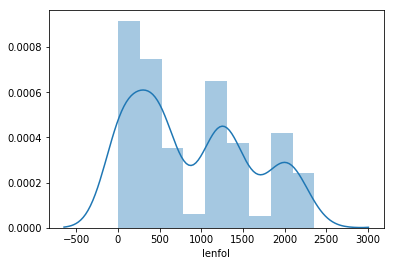

In [3]:
sns.distplot(whas500_df['lenfol'])

In [4]:
from sklearn.model_selection import train_test_split
from models import RandomSurvivalForest


x_cols = ['age', 'gender', 'hr', 'sysbp', 'diasbp', 'bmi', 'cvd', 'afb', 'sho', 'chf', 'av3', 'miord', 'mitype', 'year']
y_cols = ["lenfol", "fstat"]

X = whas500_df[x_cols]
y = whas500_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rsd = RandomSurvivalForest(n_trees=10, max_features=len(x_cols), max_depth=7)
rsd.fit(X_train, y_train)

/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


ImportError: cannot import name 'AbstractSAThresholdPredicter'

In [39]:
test_df = pd.merge(X_test, y_test, left_index=True, right_index=True)

In [40]:
pred = rsd.predict_proba(test_df[x_cols + ["lenfol"]])
pred

305    0.695278
341    0.537447
48     0.898214
68     0.887500
480    1.000000
486    0.749808
311    0.733333
32     0.358333
250    0.946092
91     0.763321
323    0.657738
169    0.812608
120    0.547917
67     0.560449
306    0.719048
190    1.000000
435    0.850000
290    0.850000
143    0.586508
147    0.400000
294    0.995833
313    0.679167
312    0.995833
493    0.793333
66     0.135897
375    0.975000
35     0.915000
343    0.968561
174    0.666667
202    0.700000
         ...   
470    0.200000
42     0.404365
160    0.043750
287    0.980909
133    0.393665
291    0.889158
497    0.412381
342    0.834048
81     0.440992
47     0.634921
457    0.962500
94     0.525000
447    0.479469
82     0.710227
373    0.710000
326    0.419391
452    0.750000
455    0.975000
376    1.000000
226    0.916667
140    0.582208
107    0.975000
233    1.000000
292    0.306349
205    0.975000
332    0.628824
198    0.995833
96     0.775000
123    0.988462
24     1.000000
Length: 150, dtype: floa

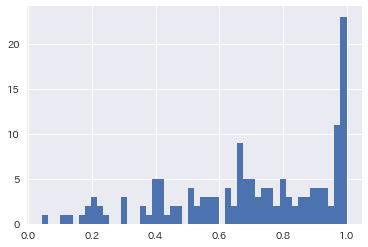

In [41]:
plt.hist(pred, bins=50)
plt.show()

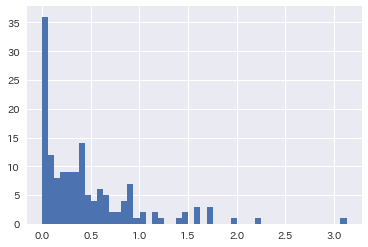

In [42]:
plt.hist(-np.log(pred), bins=50)
plt.show()

In [43]:
pred[pred < 0.5].shape[0]/pred.shape[0]

0.22

In [44]:
rsd.draw()

Tree 0
sho > 0.0
    age > 71.0
        chf > 0.0
            gender > 0.0
                hr > 82.0
                    [386.0, 403.0, 411.0, 416.0, 422.0, 445.0, 446.0, 452.0, 459.0, 475.0, 507.0, 532.0, 544.0, 573.0, 1108.0, 1109.0, 1140.0, 1253.0, 1290.0, 1319.0, 1390.0, 1400.0, 1438.0, 1899.0, 1920.0, 2006.0, 2048.0, 2084.0, 2100.0, 2118.0, 2126.0, 2168.0]
                    diasbp > 83.0
                        age > 55.0
                            [6.0, 516.0, 519.0, 1262.0, 1883.0, 2123.0, 2192.0]
                            [1.0, 587.0, 1114.0, 1178.0, 1273.0, 1506.0]
                        afb > 0.0
                            [371.0, 403.0, 433.0, 458.0, 510.0, 1496.0, 1942.0, 2061.0, 2086.0, 2152.0, 2166.0, 2173.0, 2175.0]
                            [2025.0, 2083.0]
                bmi > 27.34205
                    afb > 0.0
                        [386.0, 522.0, 1187.0, 1256.0, 1346.0, 1887.0, 1919.0, 2190.0]
                        [542.0, 1979.0]
                   

                            [359.0, 578.0]
                        bmi > 24.407970000000002
                            [6.0, 143.0, 718.0, 849.0, 2126.0]
                            [17.0, 60.0, 670.0, 1232.0]
                    age > 78.5
                        bmi > 27.34205
                            [1277.0, 1279.0, 1536.0, 2145.0, 2156.0]
                            [4.0, 91.0]
                        hr > 80.0
                            [10.0, 359.0, 450.0, 1926.0]
                            [5.0, 235.0, 550.0]
                diasbp > 62.5
                    miord > 0.0
                        hr > 95.0
                            [14.0, 465.0, 646.0, 1152.0, 1233.0]
                            [6.0, 16.0, 19.0, 93.0, 313.0]
                        diasbp > 51.0
                            [129.0, 1553.0]
                            [3.0, 140.0]
                    age > 87.0
                        diasbp > 69.0
                            [295.0, 1302.0]
               

                            [1314.0, 2057.0]
                    bmi > 27.9106
                        diasbp > 74.0
                            [129.0, 359.0, 371.0, 1939.0]
                            [920.0, 1054.0]
                        sysbp > 127.0
                            [1.0, 108.0]
                            [69.0, 450.0]
                diasbp > 61.0
                    age > 83.0
                        age > 76.0
                            [91.0, 562.0, 1232.0]
                            [343.0]
                        [313.0]
                    afb > 0.0
                        bmi > 26.141394999999996
                            [1.0, 397.0, 2114.0]
                            [18.0, 274.0, 552.0, 659.0]
                        [1.0, 673.0, 1954.0]
        sysbp > 117.0
            diasbp > 56.0
                bmi > 21.92724
                    [3.0, 4.0]
                    miord > 0.5
                        [37.0]
                        [5.0, 10.0]
        

In [11]:
TIME_LIST = np.arange(0, y_test['lenfol'].max(), 100)
survival_arr = np.zeros((len(TIME_LIST), y_test.shape[0]), dtype=float)

i = 0
for t in TIME_LIST:
    y = y_test.copy()
    y['lenfol'] = t
    test_df = pd.merge(X_test, y, left_index=True, right_index=True)

    pred = rsd.predict_proba(test_df[x_cols + ["lenfol"]])
    survival_arr[i] = pred.values
    i += 1

In [12]:
survival_df = DataFrame(survival_arr, index=TIME_LIST, columns=X_test.index.values)
survival_df.head()

,305,341,48,68,480,486,311,32,250,91,...,140,107,233,292,205,332,198,96,123,24
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100,0.917832,0.847796,0.929338,0.963421,0.941092,0.811605,0.912289,0.824337,0.844549,0.876584,...,0.815267,0.996774,0.997183,0.629876,0.993957,0.833691,0.993957,0.895803,0.988694,0.993957
200,0.883871,0.756079,0.913525,0.956148,0.933820,0.737285,0.895999,0.794925,0.778880,0.826571,...,0.766983,0.996774,0.997183,0.480364,0.993957,0.755776,0.993957,0.890398,0.988694,0.993957
300,0.877621,0.737512,0.908549,0.942120,0.905865,0.710185,0.887047,0.596979,0.752850,0.747080,...,0.713546,0.992426,0.997183,0.459877,0.993957,0.717457,0.993957,0.872236,0.988694,0.993957
400,0.877621,0.643076,0.908549,0.909683,0.877683,0.609262,0.887047,0.460523,0.664670,0.700361,...,0.637782,0.992426,0.997183,0.427437,0.993957,0.662409,0.993957,0.872236,0.988694,0.993957


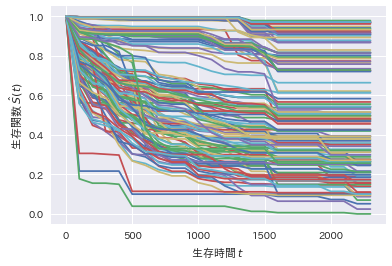

/Users/taiyou/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


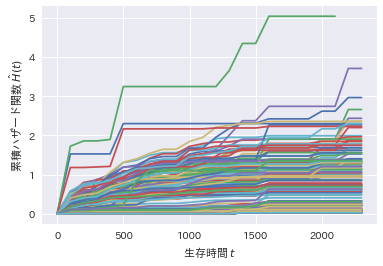

In [13]:
# 生存関数の描写
survival_df.plot(legend=False)
plt.ylabel("生存関数 $\hat{S}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()

# 累積ハザード関数の描写
cum_hazard_df = -np.log(survival_df)
cum_hazard_df.plot(legend=False)
plt.ylabel("累積ハザード関数 $\hat{H}(t)$")
plt.xlabel("生存時間 $t$")
plt.show()